#### 모듈

In [215]:
import os
import os.path as path

import pandas as pd

from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math

from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    return

#### 인코더 불러오기

In [5]:
# path
BasePath = "./encoders"

# get list of encoder files
encoder_file_list = os.listdir(BasePath)

# print list of encoder files
print(encoder_file_list)

# load encoder files
encoder_dict = {}

for file in encoder_file_list:
    encoder_name = file.replace(".npy", "")
    encoder_dict[encoder_name] = LabelEncoder()
    classes = np.load(path.join(BasePath, file), allow_pickle=True)
    encoder_dict[encoder_name].classes_ = np.load(path.join(BasePath, file), allow_pickle=True)
    
    if encoder_name == "os_version":
        encoder_dict[encoder_name].fit(list(map(lambda x: str(x), classes)))

# encoder modify
for encoder_name in encoder_dict.keys():
    # reorder encoder : make encoder[0] = nan
    encoder_dict[encoder_name].classes_ = \
        np.append(encoder_dict[encoder_name].classes_[-1],\
                    encoder_dict[encoder_name].classes_[:-1])

    print(f"{encoder_name} : {(encoder_dict[encoder_name].classes_.shape[0]) - 1} 가지\n{encoder_dict[encoder_name].classes_[1:6]}")

# reorder 'event_type' encoder classes
data_set_names = [
    'error',
    'enter.main_page',
    'enter.signup_page',
    'complete.signup',
    'enter.content_page',
    'click.content_page_start_content_button',
    'click.content_page_more_review_button',
    'enter.payment_page',
    'complete.subscription',
    'renew.subscription',
    'resubscribe.subscription',
    'start.free_trial',
    'start.content',
    'enter.lesson_page',
    'complete.lesson',
    'click.lesson_page_related_question_box',
    'end.content',
    'click.cancel_plan_button'
]
encoder_dict['event_type'].classes_ = np.array(data_set_names)

# encoder test
# print(encoder_dict["event_type"].classes_[:5])


['button.name.npy', 'button_name.npy', 'city.npy', 'content.difficulty.npy', 'content.id.npy', 'country.npy', 'coupon.discount_amount.npy', 'device_family.npy', 'device_type.npy', 'event_type.npy', 'is_free_trial.npy', 'is_trial.npy', 'language.npy', 'lesson.id.npy', 'os_name.npy', 'os_version.npy', 'paid_amount.npy', 'pg.type.npy', 'plan.price.npy', 'plan.type.npy', 'platform.npy', 'question.id.npy', 'trial.type.npy', 'type.npy', 'user_id.npy']
button.name : 9 가지
['구독 시작하기' '무료로 들어보기' '무료로 시작하기' '최저가 혜택 받기' '최저가로 시작하기']
button_name : 5 가지
['무료로 시작하기' '수강시작' '수강하기' '이어하기' None]
city : 4340 가지
["'Ewa Beach" '6th of October City' 'A Coruña' 'A Me' 'AElmhult']
content.difficulty : 5 가지
['advanced' 'beginner' 'hard' 'intermediate' None]
content.id : 212 가지
['011a040b817225cb7c01d4676c21ea44' '01d9424fd9d2b1d7a4392042fc646061'
 '035f018008f1696ded6e10e1dd757726' '03b4a290c08f7fa83933827a994f2e61'
 '040ccaa97a52e006a2c94bb7c5dce263']
country : 189 가지
['Afghanistan' 'Albania' 'Algeria' 'Ameri

#### 인코더 테스트

In [6]:
# ## 주의사항
# # 1. BaseFilePath에 데이터 파일 경로를 설정해주세요.
# # 2. 제외하고 싶은 컬럼이 있으면 exclude_columns에 추가해주세요.
# # 3. 인코딩을 하고 컬럼 이름을 바꿔 주세요.

# ## 함수 설명
# # .transform()을 이용해서 데이터를 변환해주세요.
# # .inverse_transform()을 이용해서 데이터를 역변환해주세요.


# ## 인코딩

# # 개인적으로 BaseFilePath를 설정해주었는데, 이를 이용해서 파일 리스트를 불러오는 코드입니다.
# BaseFilePath = 'd:\Codeit\intermediate_project\주제 2. 구독서비스 프로덕트 데이터 분석'
# filelist = os.listdir(BaseFilePath)[:-1]

# # 제외 컬럼
# exclude_columns = ['device_carrier', 'os_version']

# # 제외 컬럼 : 제외하고 싶은 컬럼을 추가합니다.
# exclude_columns_plus = []


# # display file list
# print(filelist)

# # load data
# dfs = []

# for file in filelist:
#     if file.endswith('.csv'):
#         df = pd.read_csv(path.join(BaseFilePath, file), nrows=1000)
        
#         # preprocess
#         # convert os_version to string
#         df['os_version'] = df['os_version'].astype(str)
#         # drop 
#         df = df.drop('device_carrier', axis=1)
#         df = df.drop('os_version', axis=1)
#         # convert client_event_time to datetime
#         df['client_event_time'] = pd.to_datetime(df['client_event_time'])
        
#         dfs.append(df)
#         print(f"file: {file}, shape: {df.shape}")

# for i, df in enumerate(dfs):
#     print(f"file: {filelist[i]} encodings - ")
    
#     # encode categorical columns using the loaded encoders
#     for col in df.columns:
#         # exception handling
#         if col not in encoder_dict:
#             continue
#         if col in exclude_columns + exclude_columns_plus:
#             continue
        
#         # encode using the loaded encoder
#         df[col] = encoder_dict[col].transform(df[col])
#         print(f"{col}: {encoder_dict[col].classes_[:5]}")
    
#     # display result head
#     display(df.head())

In [7]:
# ## 디코딩

# for i, df in enumerate(dfs):
#     print(f"file: {filelist[i]} decodings - ")
    
#     # encode categorical columns using the loaded encoders
#     for col in df.columns:
#         # exception handling
#         if col not in encoder_dict:
#             continue
#         if col in exclude_columns + exclude_columns_plus:
#             continue
        
#         # encode using the loaded encoder
#         df[col] = encoder_dict[col].inverse_transform(df[col])
#         print(f"{col}: {encoder_dict[col].classes_[:5]}")
    
#     # display result head
#     display(df.head())

#### 함수 정의

In [8]:
# 데이터를 불러오되 일정 크기 이상이면 샘플로 추출하여 크기를 줄입니다.
# 샘플크기는 4000000으로 설정되어 있습니다.
# 샘플크기를 변경하고 싶으면 samplesize를 변경해주세요.
def read_sample(path, samplesize=4000000):
    # set
    df = []
    # read
    temp = pd.read_csv(path, chunksize=2000000)
    
    # append and union
    for chunk in temp:
        df.append(chunk)
    
    # check df length
    if len(df) == 1:
        df = df[0]
    else:
        df = pd.concat(df, ignore_index=True)
    
    # sample and drop duplicates
    if df.shape[0] > samplesize:
        df = df.sample(samplesize, replace=True)
        df.drop_duplicates(inplace=True)
        df.reset_index(drop=True, inplace=True) 
        
    return df

In [9]:
def check_too_close_log(df, offset = 1):
    ## error handling
    
    # check 'user_id' column
    if 'user_id' not in df.columns:
        print("'user_id' column not found")
        return
    
    # check 'client_event_time' column
    if 'client_event_time' not in df.columns:
        print("'client_event_time' column not found")
        return
    
    # if 'client_event_time' is str, convert to datetime
    if type(df['client_event_time']) == str:    
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])

    ## main

    # drop duplicate
    temp = df.drop_duplicates().copy()
    print(f"drop duplicate : {df.shape[0] - temp.shape[0]} \\")
    df = temp.copy()
    
    # 'user_id' - max conut
    temp = df.groupby('user_id')['user_id'].count().sort_values(ascending=False)
    print(f"'user_id' - max conut : {temp.max()} \\")

    # over 1
    df_len = df.shape[0]
    print(f"over 1 : {((temp > 1).sum() / df_len * 100).round(2)}% \\" )
    
    # 'user_id', 'client_event_time' - max conut
    temp = df.groupby(['user_id', 'client_event_time'])['client_event_time']\
        .count()\
        .sort_values(ascending=False)
    print(f"'user_id', 'client_event_time' - max conut : {temp.max()} \\\n")
    
    if temp.max() > 1:
        mask = df.duplicated(subset=['user_id', 'client_event_time'], keep=False)
        display(df[mask].sort_values(['user_id', 'client_event_time']).head(10))
    
    # too_close_log check
    temp = df.sort_values(['user_id', 'client_event_time'])\
            .groupby(['user_id'])['client_event_time']\
            .diff().dt.total_seconds()
    temp = temp.dropna()
    
    # display
    print(temp.head(3))
    print(temp.tail(3), '\n\n')
    
    # display too close log
    if (temp < offset).sum() > (temp == 0).sum():
        cnt = (temp < offset).sum() - (temp == 0).sum()
        print(f"too close log : {cnt}, {(cnt / df_len * 100).round(2)}%")
        result = temp[((temp < offset) & (~(temp == 0)))]
        display(result)
        
    return result.index

#### 파일 탐색

In [10]:
%%skip  # << skipping >>

BaseFilePath = 'd:\Codeit\intermediate_project'
filelist = os.listdir(BaseFilePath)

# filter filename
dirname = [f for f in filelist if not f.endswith('.zip')][1]
print(dirname)

#### 로드 데이터

In [11]:
%%skip  # << skipping >>

# set
DF = []
dfs = []
common_cols = []
all_cols = []
core_cols = ['user_id', 'event_type', 'client_event_time']

# get filelist
filelist = os.listdir(path.join(BaseFilePath, dirname))

# read csv files and check common columns
for filename in filelist:
    # csv
    if filename.endswith('.csv'):
        print('csv file found')
    
        # read csv
        df = read_sample(path.join(BaseFilePath, dirname, filename))

        # if common columns are not set, set it            
        if common_cols == [] and list(df.columns):
            common_cols = list(df.columns)
        
        # if common columns are set, check common columns
        common_cols = list(set(common_cols).intersection(set(df.columns)))
        all_cols = list(set(all_cols).union(set(df.columns)))

        ## preprocessing
        # drop device_carrier
        df = df.drop('device_carrier', axis=1)
        # convert client_event_time to datetime
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])
        # convert os_version to string
        df['os_version'] = df['os_version'].astype(str)
        # # before update, fillna with '0'
        # df.fillna({'country' : '0', 'city' : '0', 'device_type' : '0', 'device_family' : '0'}, inplace=True)
        
        # update
        dfs.append(df)

    # if not csv, just pass    
    else:
        print('other file found')
        print(filename)

print(common_cols)

#### 데이터 통합

In [12]:
%%skip  # << skipping >>

# reset DF
if len(DF) > 0:
    DF = []

# concat dfs
DF = pd.concat(dfs[:9] + dfs[10:], axis=0).reset_index(drop=True)
print(DF.shape[0])

## preprocessing
# drop os_version
DF = DF.drop('os_version', axis=1)

# encode categorical columns using the loaded encoders
for col in DF.columns:
    # exception handling
    if col in ['client_event_time', 'device_carrier']:
        continue
    
    print(f"\n\n{col}")
    
    # encode using the loaded encoder
    DF[col] = encoder_dict[col].transform(DF[col])
    
    # display
    display(DF[col].value_counts())

# display result head   
DF

In [13]:
%%skip  # << skipping >>

com_DF = DF[core_cols].copy() # copy core_cols

print(com_DF.info())
DF.info()

In [14]:
%%skip  # << skipping >>

big_df = pd.read_csv(path.join(BaseFilePath, dirname, filelist[9]), chunksize=2000000)
enc_chunks = []

for i, chunk in enumerate(big_df):
    # preprocessing
    chunk = chunk.drop('device_carrier', axis=1)
    chunk = chunk.drop('os_version', axis=1)
    chunk['client_event_time'] = pd.to_datetime(chunk['client_event_time'])
    
    # display
    print(f"\n\n{i}")
    print(chunk.info())
    
    # encoding
    for col in chunk.columns:
        # exception handling
        if col in ['client_event_time', 'device_carrier']:
            continue
        
        # label encoding
        chunk[col] = encoder_dict[col].transform(chunk[col])
        
    enc_chunks.append(chunk)
    
big_df = pd.concat(enc_chunks, axis=0)

In [15]:
%%skip  # << skipping >>

print(big_df.info())
big_df.head()

#### 인코딩 데이터 저장

In [16]:
%%skip  # << skipping >>

# save the big_df
big_df.to_csv('total_lesson.csv', index=False)
print('done - save total_lesson.csv')

# save the DF
DF.to_csv('total.csv', index=False)
print('done - save total.csv')

#### ================================

#### 함수 정의

In [17]:
def concat_enc_df_int32(df1, df2):
    # make common columns in both dfs
    for col in df1:
        if col in df2.columns:
            continue    
        df2.loc[:, col] = 0

    for col in df2:
        if col in df1.columns:
            continue
        df1.loc[:, col] = 0

    # concat
    result = pd.concat([df1, df2], axis=0)\
                .sort_values('client_event_time')\
                .reset_index(drop=True)

    # set convert dict
    convert_dict = {col : 'int16' for col in result.columns}
    convert_dict['client_event_time'] = 'datetime64[ns]'
    convert_dict['user_id'] = 'int32'

    # convert
    result = result.astype(convert_dict)
    
    return result

In [18]:
def get_combinations(li):
    # exception handling
    if len(li) == 0:
        return []
    if len(li) == 1:
        return li
    if len(li) == 2:
        if len(set(li)) == 1:
            return [li[0]]
        return sorted(li)
    
    # set variables
    combinations = []
    act = li[0]
    only_act = 0
    
    # get combinations
    for i in li[1:]:
        next_act = i
        
        if next_act == act:
            only_act = act
            continue
        
        item = sorted([act, next_act])
        if item not in combinations:
            combinations.append(item)
            combinations = sorted(combinations)
        
        act = next_act
    
    # exception handling
    if len(combinations) == 1:
        return combinations[0]

    if len(combinations) == 0:
        return [only_act]
    
    return combinations

In [19]:
def get_set(li):
    # exception handling
    if len(li) == 0:
        return set()
    if len(li) == 1:
        return set(str(li[0]))
    if len(li) == 2:
        if len(set(li)) == 1:
            return set(str(li[0]))
        return set([str(li[0]), str(li[1])])
    
    combinations = set()
    act = li[0]
    
    # get combinations
    for i in li[1:]:
        next_act = i
        
        combinations.add(str(act))
        
        act = next_act
    
    return combinations

In [20]:
def display_cnt_rate(cnt):
    # additional information
    rate = cnt / cnt.sum() * 100
    rate_cum = rate.cumsum()

    # display
    print(f'sample_cnt : {cnt.sum()}')
    result = pd.concat([cnt, rate, rate_cum], axis = 1)
    display(result.head(30).round(2))

In [21]:
## 이벤트 타입을 사용자 정의 함수로 agg하고 결과를 보여주는 함수
def event_type_agg(df, func):
    # apply user defined function to aggregate event_type
    result = df\
        .sort_values(['user_id', 'client_event_time'])\
        .groupby(['user_id'])['event_type']\
        .agg(lambda x: func(x.values))\
        .value_counts()
        
    # display
    display_cnt_rate(result)

In [22]:
def valcnt_with_daterange(df, cols):
    if 'client_event_time' not in cols:
        cols.append('client_event_time')
        print("cautious: client_event_time is not in cols, added to cols")
    
    target_df = df[cols]
    target_cols = [col for col in cols if col != 'client_event_time']

    for col in target_df.columns:
        if col == 'client_event_time':
            continue
        
        temp_le = encoder_dict[col]
        temp_le.classes_[0] = 'NaN'
        
        target_df[col] = encoder_dict[col].inverse_transform(target_df[col])

    result = target_df[target_cols].value_counts()
    temp = target_df.groupby(target_cols)['client_event_time']
    result = pd.concat([result, temp.min().dt.date, temp.max().dt.date], axis=1)

    result.columns = ['count', 'min_date', 'max_date']
    result['dateRange'] = (result['max_date'] - result['min_date'])

    display(result)

In [255]:
def get_rate_in_columns(df, col, head_len = 10, df_name = ""):
    result = df[col].value_counts()
    rate = result / result.sum() * 100
    rate_cum = rate.cumsum()

    # get result
    result = pd.concat([result, rate, rate_cum], axis = 1)
    result.index = encoder_dict[col].inverse_transform(result.index)
    
    # set column name
    result.columns = ['count', 'rate', 'rate_cumsum']
    
    # display
    print(f"{df_name} result : ")
    display(result.head(head_len).index)
    display(result.head(head_len))

In [24]:
def display_two_sets_relation(set_A, set_B):
    print(f"set_A : {len(set_A)}")
    print(f"set_B : {len(set_B)}")
    
    print(f"set_B in set_A : {len(set_B.intersection(set_A))}")
    print(f"set_B not in set_A : {len(set_B - set_A)}")
    print(f"set_A not in set_B : {len(set_A - set_B)}")

In [25]:
def get_user_rate(df, base_mask, condition_mask):
    base_user = df.loc[base_mask, 'user_id'].unique()
    condition_user = df.loc[(condition_mask), 'user_id'].unique()
    
    base_user = set(base_user)
    condition_user = set(condition_user)
    
    # exception handling
    if len(base_user) == 0 \
    or len(base_user) == 1:
        print("base_user is empty or has only one element")
        return list(), list()
    
    if len(condition_user) == 0 \
    or len(condition_user) == 1:
        print("condition_user is empty or has only one element")
        return list(), list()
    
    # display the condition
    display_two_sets_relation(base_user, condition_user)
    print(f"condition_user rate : {round(len(condition_user.intersection(base_user)) / (len(base_user) + 1) * 100, 2)}%")
    
    return list(base_user), list(condition_user)

#### 옵션 설정

In [26]:
pd.set_option('mode.chained_assignment', None)

#### 인코딩 데이터 불러오기

In [27]:
big_df = pd.read_csv('total_lesson.csv')
print('done - load total_lesson.csv')

DF = pd.read_csv('total.csv')
print('done - load total.csv')

done - load total_lesson.csv
done - load total.csv


#### 칼럼 변환

In [28]:
# set time columns
time_cols = ['client_event_time']

# set convert dict
convert_dict1 = {col : 'int16' for col in big_df.columns}
convert_dict1['client_event_time'] = 'datetime64[ns]'
convert_dict1['user_id'] = 'int32'

convert_dict2 = {col : 'int16' for col in DF.columns}
convert_dict2['client_event_time'] = 'datetime64[ns]'
convert_dict2['user_id'] = 'int32'

# convert
big_df = big_df.astype(convert_dict1)
DF = DF.astype(convert_dict2)

# display
display(big_df.info())
display(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21029707 entries, 0 to 21029706
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               int16         
 1   client_event_time  datetime64[ns]
 2   country            int16         
 3   device_family      int16         
 4   device_type        int16         
 5   event_type         int16         
 6   language           int16         
 7   os_name            int16         
 8   platform           int16         
 9   user_id            int32         
 10  content.id         int16         
 11  is_trial           int16         
 12  lesson.id          int16         
 13  is_free_trial      int16         
dtypes: datetime64[ns](1), int16(12), int32(1)
memory usage: 722.0 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9751557 entries, 0 to 9751556
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  co

None

#### 데이터 분할

In [29]:
# separate 2022 / 2023
enter_lesson_2022 = big_df[big_df['client_event_time'].dt.year == 2022]
print(enter_lesson_2022.shape[0])
enter_lesson_2023 = big_df[big_df['client_event_time'].dt.year == 2023]
print(enter_lesson_2023.shape[0])

DF_2022 = DF[DF['client_event_time'].dt.year == 2022]
print(DF_2022.shape[0])
DF_2023 = DF[DF['client_event_time'].dt.year == 2023]
print(DF_2023.shape[0])

7373559
13655574
4819544
4931626


#### 각 연도 묶음

In [30]:
df_2022 = concat_enc_df_int32(DF_2022, enter_lesson_2022)
display(df_2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12193103 entries, 0 to 12193102
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

In [31]:
df_2023 = concat_enc_df_int32(DF_2023, enter_lesson_2023)
display(df_2023.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18587200 entries, 0 to 18587199
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int16         
 1   client_event_time       datetime64[ns]
 2   country                 int16         
 3   device_family           int16         
 4   device_type             int16         
 5   event_type              int16         
 6   language                int16         
 7   os_name                 int16         
 8   platform                int16         
 9   user_id                 int32         
 10  content.id              int16         
 11  button.name             int16         
 12  button_name             int16         
 13  question.id             int16         
 14  lesson.id               int16         
 15  type                    int16         
 16  plan.price              int16         
 17  paid_amount             int16         
 18  

None

#### 변수 선언

In [32]:
core_col = ['client_event_time', 'user_id', 'event_type']

In [33]:
com_df_23 = df_2023[core_col]
com_df_23

,client_event_time,user_id,event_type
0,2023-01-01 00:00:02.833,40880,13
1,2023-01-01 00:00:03.391,173501,13
2,2023-01-01 00:00:04.900,0,1
3,2023-01-01 00:00:06.338,173501,13
4,2023-01-01 00:00:06.741,0,1
...,...,...,...
18587195,2023-12-31 23:58:39.902,86601,4
18587196,2023-12-31 23:58:48.291,86601,13
18587197,2023-12-31 23:59:18.981,12167,4
18587198,2023-12-31 23:59:22.267,0,2


In [34]:
close_indexs = check_too_close_log(com_df_23[com_df_23['user_id'] != 0], offset = 1)

drop duplicate : 731 \
'user_id' - max conut : 17098 \
over 1 : 0.65% \
'user_id', 'client_event_time' - max conut : 2 \



,client_event_time,user_id,event_type
13865457,2023-09-11 02:50:11.945,135,14
13865458,2023-09-11 02:50:11.945,135,13
4232457,2023-03-15 17:03:06.607,172,13
4232458,2023-03-15 17:03:06.607,172,14
5438553,2023-04-10 13:37:29.981,172,13
5438554,2023-04-10 13:37:29.981,172,14
7021840,2023-05-13 08:55:12.298,218,14
7021841,2023-05-13 08:55:12.298,218,13
7037385,2023-05-13 17:41:32.087,218,13
7037386,2023-05-13 17:41:32.087,218,14


4343807    56.551
4343813     9.494
4343819     6.610
Name: client_event_time, dtype: float64
18077229    15.266
18077237    31.539
18057039     5.730
Name: client_event_time, dtype: float64 


too close log : 2266013, 14.75%


4355560     0.320
4355757     0.100
4355761     0.013
4356194     0.183
4356576     0.050
            ...  
9360438     0.477
13903782    0.349
13906092    0.072
17604818    0.244
17606801    0.176
Name: client_event_time, Length: 2266013, dtype: float64

In [35]:
temp = com_df_23[com_df_23['user_id'] != 0]\
    .groupby(['user_id', 'client_event_time'])['client_event_time']\
    .count()\
    .sort_values(ascending=False)

if temp.max() > 1:
    mask = com_df_23.duplicated(subset=['user_id', 'client_event_time'], keep=False)
    
result = com_df_23[mask]\
    .groupby(['user_id', 'client_event_time'])['event_type']\
    .agg(lambda x: str(x.values))\
    .value_counts()
rate = result / result.sum() * 100
rate_cum = rate.cumsum()

print(result.sum())

result = pd.concat([result, rate, rate_cum], axis = 1)
display(result.head(20))

2514


,count,count,count
event_type,,,
[1 1],465,18.496420,18.496420
[13 13],439,17.462212,35.958632
[5 5],376,14.956245,50.914877
[13 14],329,13.086714,64.001591
[14 13],308,12.251392,76.252983
[4 4],191,7.597454,83.850438
[2 2],57,2.267303,86.117741
[ 1 13],36,1.431981,87.549722
[13 1],28,1.113763,88.663484


[1 1]	465	18.577707	18.577707 \
메인 페이지 중복

[13 13]	439	17.538953	36.116660 \
레슨 시작 중복

[5 5]	376	15.021974	51.138634 \
콘텐츠 수강하기 중복

[14 13]	319	12.744706	63.883340 \
[13 14]	307	12.265282	76.148622 \
레슨 시작과 완료 중복

[4 4]	191	7.630843	83.779465 \
콘텐츠 개별 페이지 진입 중복

[2 2]	57	2.277267	86.056732 \
회원가입 페이지 중복

[13 1]	36	1.438274	87.495006 \
[ 1 13]	28	1.118658	89.812225 \
메인 페이지 진입과 레슨 시작 중복

[13 12]	30	1.198562	88.693568 \
[12 13]	20	0.799041	92.528965 \
콘텐츠 수강 시작과 레슨 시작 중복

[7 7]	26	1.038753	90.850979 \
결제 페이지 중복

[14 16]	22	0.878945	91.729924 \
[16 14]	16	0.639233	93.847383 \
레슨 완료와 콘텐츠 수강 완료 중복

[ 2 13]	17	0.679185	93.208150 \
[13 2]	12	0.479425	96.004794 \
레슨시작과 회원 가입 페이지 진입 중복

[16 13]	16	0.639233	94.486616 \
[13 16]	14	0.559329	95.045945 \
레슨 시작과 콘텐츠 수강 완료 중복

[ 5 12]	12	0.479425	95.525370 \
[12 5]	11	0.439473	96.444267 \
콘텐츠 수강하기 버튼 클릭과 콘텐츠 수강시작 중복

In [36]:
com_df_23.loc[close_indexs]

,client_event_time,user_id,event_type
4355560,2023-03-18 15:45:24.704,1,13
4355757,2023-03-18 15:53:42.851,1,13
4355761,2023-03-18 15:53:48.730,1,14
4356194,2023-03-18 16:18:28.448,1,13
4356576,2023-03-18 16:38:30.948,1,13
...,...,...,...
9360438,2023-07-03 04:52:16.705,179753,7
13903782,2023-09-11 10:06:34.388,179755,3
13906092,2023-09-11 10:38:24.622,179755,7
17604818,2023-11-15 04:45:44.402,179755,7


In [37]:
# set target df
df = com_df_23.loc[close_indexs]

event_type_agg(df, get_combinations)
event_type_agg(df, get_set)

sample_cnt : 64350


,count,count,count
event_type,,,
[13],15014,23.33,23.33
[7],9857,15.32,38.65
[3],4145,6.44,45.09
"[13, 14]",3790,5.89,50.98
"[7, 13]",2534,3.94,54.92
"[[13, 14], [13, 16]]",2488,3.87,58.78
"[[13, 14], [13, 16], [14, 16]]",1300,2.02,60.80
[14],1096,1.70,62.51
"[13, 16]",1015,1.58,64.09


sample_cnt : 64350


,count,count,count
event_type,,,
"{3, 1}",12240,19.02,19.02
{7},10127,15.74,34.76
"{14, 13}",4209,6.54,41.30
{3},4145,6.44,47.74
"{14, 13, 16}",3870,6.01,53.75
{13},3578,5.56,59.31
"{7, 13}",2302,3.58,62.89
"{16, 12, 13, 14}",1334,2.07,64.97
"{12, 13}",1232,1.91,66.88


{7}	                            9867	15.33	38.74 \
결제 페이지 연속 로그 \
{3}	                            4135	6.42	45.16 \
회원 가입 연속 로그 \
{1}	                            947	    1.47	67.19 \
메인 페이지 연속 로그 \
{4}	                            603	    0.94	71.82 \
콘텐츠 개별 페이지 연속 로그 \

{1, 3}	                        15068	23.41	23.41 \
서비스 메인과 회원가입 완료 \
{13, 14}	                    3783	5.88	51.04 \
레슨 시작과 완료 \
{13, 7}	                        2568	3.99	55.02 \
레슨 시작과 결제 페이지 진입 \
{1, 4}	                        1118	1.74	62.65 \
서비스 메인과 콘텐츠 개별 페이지 \
{13, 12}	                    999	    1.55	64.20 \
콘텐츠 수강 시작과 레슨 시작 \
{13, 16}	                    976	    1.52	65.72 \
레슨 시작과 콘텐츠 수강 완료 \
{7, 3}	                        860	    1.34	68.52 \
결제 페이지 진입과 회원가입 완료 \
{13, 3}	                        579	    0.90	72.72 \
레슨 시작과 회원가입 완료 \
{1, 6}	                        519	    0.81	73.52 \
서비스 메인과 콘텐츠 후기 더보기 \
{13, 5}	                        377	    0.59	74.70 \
레슨 시작과 콘텐츠 수강하기 \
{1, 2}	                        377	    0.59	75.28 \
서비스 메인과 회원가입 페이지 진입 \

{[13, 14], [13, 16]}	        2474	3.84	58.87 \
{[13, 14], [14, 16], [13, 16]}	1315	2.04	60.91 \
레슨 시작과 완료 \
레슨 시작과 콘텐츠 수강 완료 \
{[13, 14], [7, 13]}	            775	    1.20	69.73 \
레슨 시작과 결제 페이지 진입 \
레슨 시작과 완료 \
{[12, 13], [13, 14]}	        743	    1.15	70.88 \
콘텐츠 수강 시작과 레슨 시작 \
레슨 시작과 완료 \

{[12, 13], [13, 14], [13, 16]}	378	    0.59	74.11 \
콘텐츠 수강 시작과 레슨 시작 \
레슨 시작과 완료 \
레슨 시작과 콘텐츠 수강 완료 \

In [38]:
target_df = com_df_23[com_df_23['event_type'].isin([8, 9, 10, 17])]
target_df = target_df[target_df['user_id'] != 0]

event_type_agg(target_df, get_combinations)

sample_cnt : 12979


,count,count,count
event_type,,,
[8],2942,22.67,22.67
[17],2610,20.11,42.78
"[8, 17]",1631,12.57,55.34
"[[8, 9], [9, 17]]",1413,10.89,66.23
[9],1297,9.99,76.22
"[9, 17]",1284,9.89,86.12
"[8, 9]",878,6.76,92.88
"[[8, 17], [9, 17]]",254,1.96,94.84
"[10, 17]",109,0.84,95.68


In [39]:
get_rate_in_columns(df_2022[df_2022['event_type'] == 1], 'os_name', df_name = '2022')
get_rate_in_columns(df_2022[df_2022['event_type'] == 1], 'country', df_name = '2022')

get_rate_in_columns(df_2023[df_2023['event_type'] == 1], 'os_name', df_name = '2023')
get_rate_in_columns(df_2023[df_2023['event_type'] == 1], 'country', df_name = '2023')

2022 result : 


Index(['Chrome', 'Mobile Safari', 'Chrome WebView', 'Edge', 'Chrome Mobile',
       'Samsung Browser', 'Instagram', 'WebKit', 'Safari', 'Facebook'],
      dtype='object')

,count,count,count
Chrome,508442,47.835896,47.835896
Mobile Safari,135665,12.763810,60.599706
Chrome WebView,74289,6.989354,67.589059
Edge,63931,6.014839,73.603898
Chrome Mobile,63764,5.999127,79.603025
Samsung Browser,49966,4.700966,84.303991
Instagram,43105,4.055460,88.359451
WebKit,41889,3.941055,92.300506
Safari,39992,3.762579,96.063085
Facebook,17503,1.646740,97.709825


2022 result : 


Index([   'South Korea',  'United States',          'Japan',         'Canada',
              'Germany',        'Ireland',      'Australia',      'Singapore',
       'United Kingdom',              nan],
      dtype='object')

,count,count,count
South Korea,1033918,97.274407,97.274407
United States,10219,0.961437,98.235844
Japan,3051,0.287048,98.522892
Canada,2584,0.243111,98.766004
Germany,1970,0.185344,98.951348
Ireland,1419,0.133504,99.084852
Australia,1054,0.099164,99.184016
Singapore,953,0.089661,99.273677
United Kingdom,849,0.079877,99.353554
NaN,828,0.077901,99.431455


2023 result : 


Index(['Chrome', 'Instagram', 'Mobile Safari', 'Samsung Browser', 'Whale',
       'Edge', 'Safari', 'Facebook', 'Chrome WebView', 'WebKit'],
      dtype='object')

,count,count,count
Chrome,488001,45.581499,45.581499
Instagram,160265,14.969475,60.550975
Mobile Safari,119796,11.189488,71.740462
Samsung Browser,76236,7.120787,78.861249
Whale,66705,6.230549,85.091798
Edge,65378,6.106601,91.198399
Safari,29427,2.748615,93.947013
Facebook,21492,2.007450,95.954463
Chrome WebView,18360,1.714907,97.669370
WebKit,12223,1.141683,98.811054


2023 result : 


Index([   'South Korea',  'United States',          'Japan',         'Canada',
                    nan,        'Germany',      'Australia',          'India',
       'United Kingdom',      'Singapore'],
      dtype='object')

,count,count,count
South Korea,1045347,97.640135,97.640135
United States,8696,0.812246,98.452381
Japan,2278,0.212775,98.665156
Canada,1558,0.145524,98.810680
NaN,1041,0.097234,98.907914
Germany,1039,0.097047,99.004962
Australia,916,0.085559,99.090520
India,868,0.081075,99.171595
United Kingdom,839,0.078366,99.249962
Singapore,783,0.073136,99.323097


In [40]:
# os_name mobile device category
mobile_category = [
       'Mobile Safari', 
       'Chrome WebView', 
       'Chrome Mobile',
       'Samsung Browser', 
       'Instagram'
       ]


In [41]:
target_df = df_2022[df_2022['event_type'] == 1]
get_rate_in_columns(target_df[target_df['user_id'] != 0], 'os_name', df_name = '2022')
get_rate_in_columns(target_df[target_df['user_id'] != 0], 'country', df_name = '2022')


2022 result : 


Index(['Chrome', 'Edge', 'Mobile Safari', 'Chrome WebView', 'Safari',
       'Samsung Browser', 'Chrome Mobile', 'WebKit', 'Whale', 'Firefox'],
      dtype='object')

,count,count,count
Chrome,273470,64.879882,64.879882
Edge,33722,8.000437,72.880318
Mobile Safari,25573,6.067112,78.947431
Chrome WebView,24137,5.726426,84.673857
Safari,17181,4.076137,88.749994
Samsung Browser,16016,3.799745,92.549739
Chrome Mobile,15558,3.691086,96.240824
WebKit,5883,1.395723,97.636547
Whale,4021,0.953969,98.590517
Firefox,2111,0.500828,99.091345


2022 result : 


Index(['South Korea', 'United States', 'Canada', 'Japan', 'Germany',
       'Singapore', 'Vietnam', 'Australia', 'United Kingdom', 'Hong Kong'],
      dtype='object')

,count,count,count
South Korea,411800,97.698232,97.698232
United States,2202,0.522417,98.220649
Canada,1714,0.406641,98.627290
Japan,1460,0.346380,98.973670
Germany,1007,0.238908,99.212578
Singapore,455,0.107947,99.320525
Vietnam,444,0.105338,99.425863
Australia,423,0.100355,99.526218
United Kingdom,265,0.062870,99.589089
Hong Kong,259,0.061447,99.650535


In [42]:
user_indexs = []

for i, col in enumerate(data_set_names):
    print(f"[{i}] : {col}")
    temp = df_2022.loc[df_2022['event_type'] == i].groupby('user_id').count()
    user_22 = temp.index
    temp = df_2023.loc[df_2023['event_type'] == i].groupby('user_id').count()
    user_23 = temp.index

    user_index = list(set(list(user_22) + list(user_23)))
    
    print(len(user_index))
    
    user_indexs.append(user_index)

[0] : error
0
[1] : enter.main_page
75366
[2] : enter.signup_page
1
[3] : complete.signup
145133
[4] : enter.content_page
72703
[5] : click.content_page_start_content_button
35109
[6] : click.content_page_more_review_button
3196
[7] : enter.payment_page
63919
[8] : complete.subscription
13881
[9] : renew.subscription
7498
[10] : resubscribe.subscription
761
[11] : start.free_trial
16308
[12] : start.content
42798
[13] : enter.lesson_page
113919
[14] : complete.lesson
46678
[15] : click.lesson_page_related_question_box
40406
[16] : end.content
29236
[17] : click.cancel_plan_button
14643


In [43]:
valcnt_with_daterange(df_2022, ['plan.type', 'plan.price', 'pg.type', 'client_event_time'])
valcnt_with_daterange(df_2023, ['plan.type', 'plan.price', 'pg.type', 'client_event_time'])

count    min_date    max_date  \
plan.type plan.price pg.type                                     
NaN       NaN        NaN      12181542  2022-01-01  2022-12-31   
          15920      NaN          6614  2022-01-02  2022-12-31   
          79200      NaN          2171  2022-11-30  2022-12-31   
          42960      NaN          1775  2022-01-01  2022-12-30   
          131600     NaN           992  2022-01-05  2022-11-30   
          83200      NaN             9  2022-12-31  2022-12-31   

                                      dateRange  
plan.type plan.price pg.type                     
NaN       NaN        NaN      364 days, 0:00:00  
          15920      NaN      363 days, 0:00:00  
          79200      NaN       31 days, 0:00:00  
          42960      NaN      363 days, 0:00:00  
          131600     NaN      329 days, 0:00:00  
          83200      NaN                0:00:00

count    min_date    max_date  \
plan.type plan.price pg.type                                     
NaN       NaN        NaN      18565297  2023-01-01  2023-12-31   
          15920      NaN         10736  2023-01-01  2023-10-27   
                     A            2474  2023-10-27  2023-12-31   
          131600     NaN          1609  2023-01-31  2023-10-27   
1개월 플랜    15920      NaN          1278  2023-01-31  2023-04-30   
12개월 플랜   131600     NaN          1161  2023-01-31  2023-04-30   
NaN       95520      A             979  2023-12-10  2023-12-31   
          83200      NaN           841  2023-01-01  2023-01-10   
          95520      B             519  2023-12-10  2023-12-31   
          87200      NaN           496  2023-01-10  2023-01-17   
          95200      NaN           461  2023-01-24  2023-01-31   
          42960      NaN           423  2023-01-01  2023-10-25   
          91200      NaN           326  2023-01-17  2023-01-24   
          131600     A             260  2023-10-27  2023-12-31   
          15920      B             213  2023-11-06  2023-12-30   
          131600     B              35  2023-11-09  2023-12-07   
          15920      C              28  2023-10-28  2023-12-28   
          14328      NaN            21  2023-05-02  2023-10-21   
          42960      C              16  2023-11-11  2023-12-30   
                     A              16  2023-11-04  2023-12-27   
          118440     NaN             3  2023-05-02  2023-06-04   
          131600     C               3  2023-10-27  2023-11-05   
          95520      C               2  2023-12-15  2023-12-26   
          14328      A               2  2023-11-17  2023-12-17   
          19920      NaN             1  2023-03-16  2023-03-16   

                                      dateRange  
plan.type plan.price pg.type                     
NaN       NaN        NaN      364 days, 0:00:00  
          15920      NaN      299 days, 0:00:00  
                     A         65 days, 0:00:00  
          131600     NaN      269 days, 0:00:00  
1개월 플랜    15920      NaN       89 days, 0:00:00  
12개월 플랜   131600     NaN       89 days, 0:00:00  
NaN       95520      A         21 days, 0:00:00  
          83200      NaN        9 days, 0:00:00  
          95520      B         21 days, 0:00:00  
          87200      NaN        7 days, 0:00:00  
          95200      NaN        7 days, 0:00:00  
          42960      NaN      297 days, 0:00:00  
          91200      NaN        7 days, 0:00:00  
          131600     A         65 days, 0:00:00  
          15920      B         54 days, 0:00:00  
          131600     B         28 days, 0:00:00  
          15920      C         61 days, 0:00:00  
          14328      NaN      172 days, 0:00:00  
          42960      C         49 days, 0:00:00  
                     A         53 days, 0:00:00  
          118440     NaN       33 days, 0:00:00  
          131600     C          9 days, 0:00:00  
          95520      C         11 days, 0:00:00  
          14328      A         30 days, 0:00:00  
          19920      NaN                0:00:00

In [44]:
# df_2022.info()

valcnt_with_daterange(df_2022, ['button.name', 'button_name', 'client_event_time'])
valcnt_with_daterange(df_2023, ['button.name', 'button_name', 'client_event_time'])

count    min_date    max_date          dateRange
button.name button_name                                                     
NaN         NaN          12154161  2022-01-01  2022-12-31  364 days, 0:00:00
            이어하기            23786  2022-01-01  2022-07-15  195 days, 0:00:00
            무료로 시작하기         6093  2022-01-01  2022-07-13  193 days, 0:00:00
            수강하기             5345  2022-01-01  2022-07-12  192 days, 0:00:00
            수강시작             3716  2022-01-01  2022-07-11  191 days, 0:00:00
무료로 들어보기    NaN                 1  2022-12-31  2022-12-31            0:00:00
할인받고 구독 시작  NaN                 1  2022-11-17  2022-11-17            0:00:00

,,count,min_date,max_date,dateRange
button.name,button_name,,,,
NaN,NaN,18500960,2023-01-01,2023-12-31,"364 days, 0:00:00"
콘텐츠 구독하기,NaN,40961,2023-01-01,2023-12-31,"364 days, 0:00:00"
콘텐츠 이어보기,NaN,27797,2023-01-01,2023-12-31,"364 days, 0:00:00"
무료로 들어보기,NaN,13595,2023-01-01,2023-05-27,"146 days, 0:00:00"
무료로 시작하기,NaN,2513,2023-01-01,2023-07-23,"203 days, 0:00:00"
최저가 혜택 받기,NaN,907,2023-01-01,2023-01-31,"30 days, 0:00:00"
최저가로 시작하기,NaN,293,2023-01-11,2023-01-31,"20 days, 0:00:00"
구독 시작하기,NaN,174,2023-02-01,2023-04-29,"87 days, 0:00:00"


In [45]:
def display_user_rates(user_indexs, data_set_names, df1 = df_2022, df2 = df_2023, accept_action = range(1, len(user_indexs))):
    for i in range(1, len(user_indexs)-1):
        # exception handling
        if i not in accept_action:
            continue
        
        for j in range(i+1, len(user_indexs)):
            # exception handling
            if j not in accept_action:
                continue

            # sort by length
            if len(user_indexs[i]) < len(user_indexs[j]):
                base = j
                cond = i
            else:
                base = i
                cond = j
            
            ## 2022
            print(f"\n{data_set_names[cond]} / {data_set_names[base]}")
            print(f"\n{cond} / {base}")
            print(f"\n{len(user_indexs[cond])} / {len(user_indexs[base])}")
            # mask
            base_mask = df1['user_id'].isin(user_indexs[base])
            condition_mask = df1['user_id'].isin(user_indexs[cond])
            # get the condition user rate
            base_user1, condition_user1 = get_user_rate(df1, base_mask, condition_mask)
            
            ## 2023
            print(f"\n{data_set_names[cond]} / {data_set_names[base]}")
            print(f"\n{cond} / {base}")
            print(f"\n{len(user_indexs[cond])} / {len(user_indexs[base])}")
            # mask
            base_mask = df2['user_id'].isin(user_indexs[base])
            condition_mask = df2['user_id'].isin(user_indexs[cond])
            # get the condition user rate
            base_user2, condition_user2 = get_user_rate(df2, base_mask, condition_mask)
            
            # get total sets
            base_user = set(base_user1 + base_user2)
            condition_user = set(condition_user1 + condition_user2)
            
            # display the condition
            display_two_sets_relation(base_user, condition_user)
            print(f"condition_user rate : {round(len(condition_user.intersection(base_user)) / (len(base_user) + 1) * 100, 2)}%")       

In [46]:
# display_user_rates(user_indexs, data_set_names)      

In [47]:
display_user_rates(user_indexs, data_set_names, accept_action = [8, 9, 10, 17])


renew.subscription / complete.subscription

9 / 8

7498 / 13881
set_A : 7334
set_B : 4838
set_B in set_A : 2909
set_B not in set_A : 1929
set_A not in set_B : 4425
condition_user rate : 39.66%

renew.subscription / complete.subscription

9 / 8

7498 / 13881
set_A : 10838
set_B : 6599
set_B in set_A : 4757
set_B not in set_A : 1842
set_A not in set_B : 6081
condition_user rate : 43.89%
set_A : 13881
set_B : 7498
set_B in set_A : 5385
set_B not in set_A : 2113
set_A not in set_B : 8496
condition_user rate : 38.79%

resubscribe.subscription / complete.subscription

10 / 8

761 / 13881
set_A : 7334
set_B : 573
set_B in set_A : 288
set_B not in set_A : 285
set_A not in set_B : 7046
condition_user rate : 3.93%

resubscribe.subscription / complete.subscription

10 / 8

761 / 13881
set_A : 10838
set_B : 702
set_B in set_A : 368
set_B not in set_A : 334
set_A not in set_B : 10470
condition_user rate : 3.4%
set_A : 13881
set_B : 761
set_B in set_A : 402
set_B not in set_A : 359
set_A not in set

In [48]:
MIN_DATE = df_2022['client_event_time'].min()
MAX_DATE = df_2023['client_event_time'].max()

print(f'MIN_DATE : {MIN_DATE}')
print(f'MAX_DATE : {MAX_DATE}')

MIN_DATE : 2022-01-01 00:00:01.181000
MAX_DATE : 2023-12-31 23:59:35.209000


In [49]:
len(encoder_dict['user_id'].classes_)
user_df = pd.DataFrame(range(len(encoder_dict['user_id'].classes_)), columns=['user_id'])

# default setting
user_df['sign_up_time'] = MIN_DATE
user_df['first_subscription_time'] = MAX_DATE
user_df['last_event_time'] = MIN_DATE

# update sign_up_time
target = df_2022[df_2022['event_type'] == 3].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'sign_up_time'] = target
target = df_2023[df_2023['event_type'] == 3].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'sign_up_time'] = target

# update first_subscription_time
target = df_2022[df_2022['event_type'] == 8].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'first_subscription_time'] = target
target = df_2023[df_2023['event_type'] == 8].groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'first_subscription_time'] = target

## update first_subscription_time
# 2022
temp_df = df_2022
mask = (user_df['first_subscription_time'] == MAX_DATE)
mask1 = temp_df['user_id'].isin(mask)
mask2 = (temp_df['event_type'].isin([8,9,10]))
mask = mask1 & mask2
print(f'mask1: {mask1.sum()}, mask2: {mask2.sum()}, mask: {mask.sum()}')

target = temp_df[mask].groupby('user_id')['client_event_time'].min()
user_df.loc[target.index, 'first_subscription_time'] = target

# 2023
temp_df = df_2023
mask = (user_df['first_subscription_time'] == MAX_DATE)
mask1 = temp_df['user_id'].isin(mask)
mask2 = (temp_df['event_type'].isin([8,9,10]))
mask = mask1 & mask2

target = temp_df[mask].groupby('user_id')['client_event_time'].min()
user_df.loc[target.index, 'first_subscription_time'] = target

# update last_event_time
target = df_2022.groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'last_event_time'] = target
target = df_2023.groupby('user_id')['client_event_time'].max()
user_df.loc[target.index, 'last_event_time'] = target

# save the user_df
user_df


mask1: 1178622, mask2: 11561, mask: 0


,user_id,sign_up_time,first_subscription_time,last_event_time
0,0,2022-01-01 00:00:01.181,2023-12-31 23:59:35.209,2023-12-31 23:59:22.267
1,1,2023-03-18 10:33:16.237,2023-03-25 14:40:01.647,2023-05-25 14:50:01.753
2,2,2023-03-27 04:54:01.257,2023-04-08 11:45:01.586,2023-05-01 11:18:40.158
3,3,2022-12-16 05:05:24.926,2023-12-31 23:59:35.209,2022-12-16 05:05:26.141
4,4,2022-01-01 00:00:01.181,2023-12-31 23:59:35.209,2022-01-02 01:18:06.966
...,...,...,...,...
179753,179753,2023-07-03 04:52:16.228,2023-12-31 23:59:35.209,2023-07-03 05:12:48.496
179754,179754,2022-01-01 00:00:01.181,2023-12-31 23:59:35.209,2022-03-18 11:29:31.915
179755,179755,2023-09-11 10:06:34.388,2023-12-31 23:59:35.209,2023-11-30 03:37:51.652
179756,179756,2023-11-29 05:23:47.312,2023-12-31 23:59:35.209,2023-11-29 05:23:53.042


In [50]:
def get_last_payment(target_time, user_df, payment_df, display_opt = True):
    # get the last payment
    last_payment = payment_df[payment_df['client_event_time'] < target_time].groupby('user_id')['client_event_time'].max()
    #
    temp_df1 = last_payment.reset_index()
    temp_df2 = payment_df[['user_id', 'client_event_time', 'event_type']]
    #
    last_payment = pd.merge(temp_df1, temp_df2, on=['user_id', 'client_event_time'], how='left')
    last_payment.rename(columns={'event_type' : 'last_payment_type', 'client_event_time' : 'last_payment_time'}, inplace=True)

    # get result
    result = pd.DataFrame(user_df['user_id'], columns=['user_id'])
    result = pd.merge(result, last_payment, on='user_id', how='left')
    #
    result.fillna({'last_payment_time' : MAX_DATE, 'last_payment_type' : 0}, inplace=True)
    result = result.astype({'last_payment_type' : 'int16'})
    result['last_payment_type'] = encoder_dict['event_type'].inverse_transform(result['last_payment_type'])

    if display_opt:
        display(result)
    return result

In [51]:
# set target time
target_time = '2023-11-11'

# get target user
target_user_df = user_df[user_df['last_event_time'] > MIN_DATE]
target_user_df = target_user_df[target_user_df['sign_up_time'] < target_time]

# get payment_df
payment_df = pd.concat([df_2022[df_2022['event_type'].isin([8, 9, 10, 17])], df_2023[df_2023['event_type'].isin([8, 9, 10, 17])]])
payment_df = payment_df[payment_df['user_id'] != 0]
payment_df = payment_df.reset_index(drop=True)
payment_df = payment_df[['user_id', 'client_event_time', 'event_type', 'plan.type', 'plan.price', 'pg.type']]
payment_df = payment_df.drop_duplicates()

# get result
result = get_last_payment(target_time, target_user_df, payment_df)
result = result['last_payment_type'].value_counts().sort_index()

print(list(result))
print(list(result.index))
display_cnt_rate(result)

,user_id,last_payment_time,last_payment_type
0,0,2023-12-31 23:59:35.209,error
1,1,2023-05-25 14:50:01.753,renew.subscription
2,2,2023-04-08 11:45:01.586,complete.subscription
3,3,2023-12-31 23:59:35.209,error
4,4,2023-12-31 23:59:35.209,error
...,...,...,...
164484,179750,2023-12-31 23:59:35.209,error
164485,179751,2023-09-27 04:07:34.773,renew.subscription
164486,179753,2023-12-31 23:59:35.209,error
164487,179754,2023-12-31 23:59:35.209,error


[12675, 3754, 144931, 2992, 137]
['click.cancel_plan_button', 'complete.subscription', 'error', 'renew.subscription', 'resubscribe.subscription']
sample_cnt : 164489


,count,count,count
last_payment_type,,,
click.cancel_plan_button,12675,7.71,7.71
complete.subscription,3754,2.28,9.99
error,144931,88.11,98.10
renew.subscription,2992,1.82,99.92
resubscribe.subscription,137,0.08,100.00


In [52]:
free_22 = df_2022[df_2022['event_type'] == 11]
free_23 = df_2023[df_2023['event_type'] == 11]

free_df = pd.concat([free_22, free_23], axis=0)
free_df = free_df[free_df['user_id'] != 0]
free_df

display_two_sets_relation(set(free_df.loc[free_df['trial.type'] == 1, 'user_id']), set(free_df.loc[free_df['trial.type'] == 2, 'user_id']))

set_A : 13907
set_B : 2439
set_B in set_A : 39
set_B not in set_A : 2400
set_A not in set_B : 13868


In [53]:
%%skip  # << skipping >>

# resampling date
date_idx = pd.date_range(MIN_DATE, MAX_DATE, freq='D').floor("D")
print(date_idx)

# create df_data
df_data = []
dict_template = dict([
    ('click.cancel_plan_button', 0), 
    ('complete.subscription', 0), 
    ('error', 0),
    ('renew.subscription', 0),
    ('enter.lesson_page', 0),
    ('resubscribe.subscription', 0)
])
print(dict_template)

payment_df = pd.concat([df_2022[df_2022['event_type'].isin([8, 9, 10, 17, 13])], df_2023[df_2023['event_type'].isin([8, 9, 10, 17, 13])]])
payment_df = payment_df[payment_df['user_id'] != 0]
payment_df = payment_df.reset_index(drop=True)
payment_df = payment_df[['user_id', 'client_event_time', 'event_type', 'plan.type', 'plan.price', 'pg.type']]
payment_df = payment_df.drop_duplicates()

# get df_data
for date in date_idx:
    target_time = date.date().strftime('%Y-%m-%d')
    target_user_df = user_df[user_df['sign_up_time'] < target_time]

    print(target_time)    

    result = get_last_payment(target_time, target_user_df, payment_df, display_opt = False)
    result = result['last_payment_type'].value_counts()
    
    temp_dict = dict_template.copy()
    for col in result.index:
        temp_dict[col] = result[col]
    
    df_data.append(list(temp_dict.values()))

# set df columns
cols = ['click.cancel_plan_button', 'complete.subscription', 'error', 'renew.subscription', 'enter.lesson_page', 'resubscribe.subscription']

# display
df = pd.DataFrame(index=date_idx, data=df_data, columns=cols)
df

,click.cancel_plan_button,complete.subscription,error,renew.subscription,enter.lesson_page,resubscribe.subscription
2022-01-01,0,0,0,0,0,0
2022-01-02,16,0,34333,0,698,0
2022-01-03,46,1,34131,0,1270,0
2022-01-04,73,2,33673,0,2061,0
2022-01-05,100,2,33458,0,2561,0
...,...,...,...,...,...,...
2023-12-27,8001,407,62769,1819,104870,27
2023-12-28,8034,413,62853,1833,105081,28
2023-12-29,8047,439,63067,1855,105159,31
2023-12-30,8051,487,63340,1899,105119,35


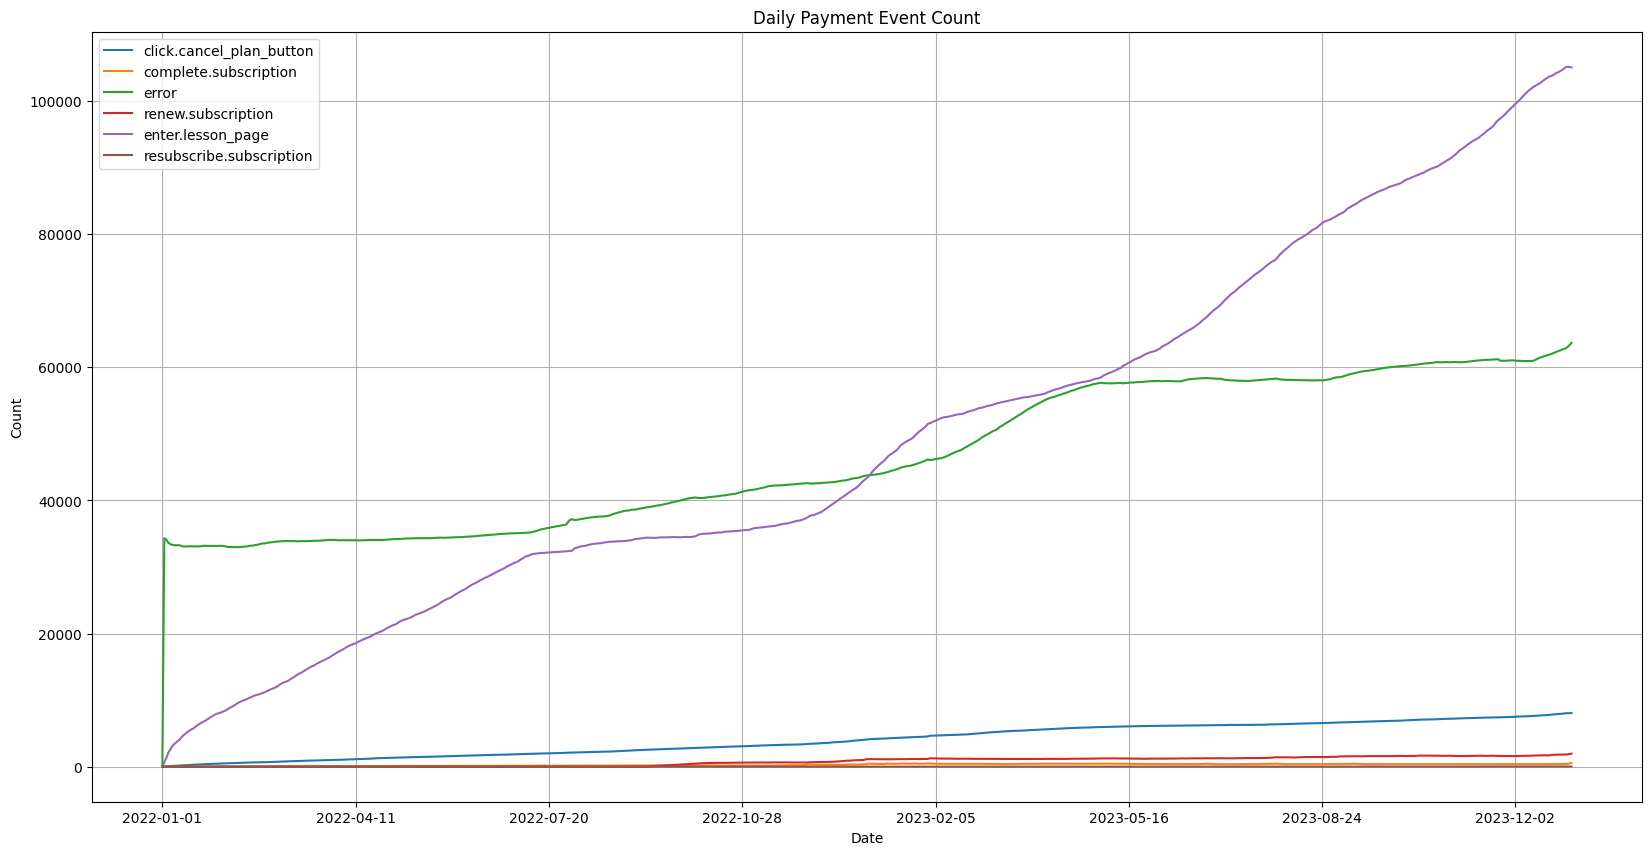

In [54]:
temp_df = df

temp_df = pd.read_csv('payment_event_count.csv', index_col=0)
temp_df.to_csv('payment_event_count.csv', index=True)
display(temp_df)
# temp_df = df[['click.cancel_plan_button', 'complete.subscription', 'renew.subscription', 'resubscribe.subscription']].copy()

# for col in temp_df.columns:
#     temp_df[col] = temp_df[col].map(lambda x: round(math.sqrt(math.sqrt(x)), 2))

plot = temp_df.plot(figsize=(20, 10), title='Daily Payment Event Count', xlabel='Date', ylabel='Count', grid=True)

In [105]:
result1 = df_2022['device_family'].value_counts()
display(result1)
result2 = df_2023['device_family'].value_counts()
display(result2)

idx = set(result1.index) | set(result2.index)
result = dict()

for i in idx:
    result[i] = result1.get(i, 0) + result2.get(i, 0)

result = pd.Series(result)
result.sort_values(ascending=False, inplace=True)
result.index = encoder_dict['device_family'].inverse_transform(result.index)
target = dict({str(device_family) : ['None', result[device_family]] for device_family in result.index})

PC_OS_names = ['Windows', 'Mac', 'Linux', 'Ubuntu']
etc_names = ['K', 'Tizen']
for key, value in target.items():
    if (key in PC_OS_names) and (value[0] == 'None'):
        target[key][0] = "PC"
    if (key.find('OS') != -1) and (value[0] == 'None'):
        target[key][0] = "PC"
        
    if (key.find('Phone') != -1) and (value[0] == 'None'):
        target[key][0] = "Phone"
    if (key.find('Android') != -1) and (value[0] == 'None'):
        target[key][0] = "Phone"
    if (key.find('iPad') != -1) and (value[0] == 'None'):
        target[key][0] = "Phone"
    if (key.find('Note') != -1) and (value[0] == 'None'):
        target[key][0] = "Phone"
    if (key.find('Tablet') != -1) and (value[0] == 'None'):
        target[key][0] = "Phone"
    if (key.find(' Tab') != -1) and (value[0] == 'None'):
        target[key][0] = "Phone"
    if (key.find('-') != -1) and (value[0] == 'None'):
        target[key][0] = "Phone"
    if (key.find(r'/d') != -1) and (value[0] == 'None'):
        target[key][0] = "Phone"

target

device_family
1029    8326396
570     2135437
129      606224
135      579056
130      161800
         ...   
244           1
804           1
460           1
1061          1
101           1
Name: count, Length: 286, dtype: int64

device_family
1029    12958831
570      3305877
135       751392
773       656192
342       219158
          ...   
119            1
490            1
261            1
911            1
276            1
Name: count, Length: 1060, dtype: int64

{'Windows': ['PC', 21285227],
 'Mac': ['PC', 5441314],
 'Apple iPhone': ['Phone', 1330448],
 'Samsung Phone': ['Phone', 802560],
 'Android': ['Phone', 607282],
 'Apple iPad': ['Phone', 360897],
 'Linux': ['PC', 241456],
 'K': ['None', 219200],
 'nan': ['None', 141080],
 'Samsung Galaxy Note': ['Phone', 106838],
 'Samsung Galaxy Phone': ['Phone', 87037],
 'Samsung Tablet': ['Phone', 74046],
 'Samsung SM-S918N': ['Phone', 8608],
 'Samsung SM-S911N': ['Phone', 5693],
 'Chromium OS': ['PC', 5678],
 'LG LM-V500N': ['Phone', 4722],
 'LGE Phone': ['Phone', 4591],
 'Samsung SM-S916N': ['Phone', 4397],
 'Redmi Phone': ['Phone', 3281],
 'Xiaomi Phone': ['Phone', 2690],
 'LG LM-V510N': ['Phone', 2428],
 'Google Nexus Phone': ['Phone', 2348],
 'Samsung Galaxy Tab': ['Phone', 1977],
 'Samsung SM-P905F': ['Phone', 1943],
 'LGM-V300L': ['Phone', 1740],
 'LG LM-V409N': ['Phone', 1593],
 'Ubuntu': ['PC', 1587],
 'LG LM-Q927L': ['Phone', 1537],
 'Lenovo TB-J606F': ['Phone', 1378],
 'LG LM-Q920N': ['Phon

In [191]:
def get_pay_duration(event_list):
    start = 0
    end = 0
    sum = pd.Timedelta(0)
    
    for event in event_list:
        if (start == 0) and event[2] in ['8', '9', '10']:
            start = pd.to_datetime(event[0] + ' ' + event[1])
        if (end == 0) and (event[2] == '17'):
            end = pd.to_datetime(event[0] + ' ' + event[1])
        
        if (start != 0) and (end != 0):
            sum = sum + (end - start)
            start = 0
            end = 0
    
    if sum == pd.Timedelta(0) and end != 0:
        return (end - MIN_DATE)
    if sum == pd.Timedelta(0) and start != 0:
        return (MAX_DATE - start)

    return sum

In [258]:
def get_non_pay_duration(event_list):
    start = 0
    end = 0
    sum = pd.Timedelta(0)
    before_price = 0
    price = 0
    
    for event in event_list:
        if (end == 0) and event[2] in ['8', '9', '10']:
            end = pd.to_datetime(event[0] + ' ' + event[1])
            before_price = price
            price = event[3]
        if (start == 0) and (event[2] == '17'):
            start = pd.to_datetime(event[0] + ' ' + event[1])
            end = 0
        
        if (start != 0) and (end != 0):
            sum = sum + (end - start)
            start = 0
            end = 0
    
    # if sum == pd.Timedelta(0) and end != 0:
    #     return (end - MIN_DATE)

    return [sum, price, before_price]

In [259]:
payment_df.sort_values(['user_id', 'client_event_time'], ascending=True, inplace=True)
temp_df = payment_df[['user_id', 'client_event_time', 'event_type', 'plan.price']].copy()
temp_df['total'] = payment_df['client_event_time']
temp_df['total'] = temp_df['total'].astype(str)
temp_df['total'] = temp_df['total']\
        + ' ' + temp_df['event_type'].astype(str)\
        + ' ' + temp_df['plan.price'].astype(str)

display(temp_df.groupby('user_id')['total'].aggregate(lambda x: [ item.split()[1:] for item in str(x).split('\n')[:-1] ]))
pay_duration = temp_df.groupby('user_id')['total'].aggregate(lambda x: get_pay_duration([ item.split()[1:] for item in str(x).split('\n')[:-1] ]))
display(pay_duration)
non_pay_duration = temp_df.groupby('user_id')['total'].aggregate(lambda x: get_non_pay_duration([ item.split()[1:] for item in str(x).split('\n')[:-1] ]))
display(non_pay_duration)


user_id
1         [[2023-03-25, 14:40:01.647, 8, 2], [2023-04-25...
2                       [[2023-04-08, 11:45:01.586, 8, 12]]
6                        [[2023-11-29, 01:13:51.820, 8, 2]]
21                      [[2022-01-04, 09:37:40.238, 17, 0]]
33        [[2022-12-01, 14:15:35.085, 9, 5], [2023-01-14...
                                ...                        
179738    [[2023-09-10, 03:16:01.197, 8, 2], [2023-10-17...
179741    [[2023-02-01, 01:05:30.212, 9, 12], [2023-02-0...
179744    [[2023-01-18, 02:50:02.681, 9, 2], [2023-02-18...
179745                  [[2022-09-10, 06:35:53.709, 17, 0]]
179751    [[2023-04-08, 12:45:01.546, 9, 2], [2023-05-08...
Name: total, Length: 20972, dtype: object

user_id
1        281 days 09:19:33.562000
2        267 days 12:14:33.623000
6         32 days 22:45:43.389000
21         3 days 09:37:39.057000
33        43 days 23:19:04.203000
                   ...           
179738    68 days 00:28:21.579000
179741     0 days 00:50:47.569000
179744   120 days 00:53:56.907000
179745   252 days 06:35:52.528000
179751   102 days 03:59:46.901000
Name: total, Length: 20972, dtype: timedelta64[ns]

user_id
1                  [0 days 00:00:00, 2, 0]
2                 [0 days 00:00:00, 12, 0]
6                  [0 days 00:00:00, 2, 0]
21                 [0 days 00:00:00, 0, 0]
33                 [0 days 00:00:00, 5, 0]
                        ...               
179738             [0 days 00:00:00, 2, 0]
179741            [0 days 00:00:00, 12, 0]
179744             [0 days 00:00:00, 2, 0]
179745             [0 days 00:00:00, 0, 0]
179751    [69 days 11:22:46.326000, 10, 2]
Name: total, Length: 20972, dtype: object

In [274]:
non_pay_duration = non_pay_duration.apply(pd.Series)
non_pay_duration.columns = ['non_pay_duration', 'plan.price', 'before_plan.price']
non_pay_duration['plan.price'] = non_pay_duration['plan.price'].astype(int)
non_pay_duration['before_plan.price'] = non_pay_duration['before_plan.price'].astype(int)
display(non_pay_duration)
result = non_pay_duration.loc[non_pay_duration['non_pay_duration'] > pd.Timedelta(0)]
display(result[result['before_plan.price'] == 0])
result['before_plan.price'] = encoder_dict['plan.price'].inverse_transform(result['before_plan.price'])
result['plan.price'] = encoder_dict['plan.price'].inverse_transform(result['plan.price'])
result = result[['plan.price', 'before_plan.price']].value_counts().sort_index()
result[result > 1]

,non_pay_duration,plan.price,before_plan.price
user_id,,,
1,0 days 00:00:00,2,0
2,0 days 00:00:00,12,0
6,0 days 00:00:00,2,0
21,0 days 00:00:00,0,0
33,0 days 00:00:00,5,0
...,...,...,...
179738,0 days 00:00:00,2,0
179741,0 days 00:00:00,12,0
179744,0 days 00:00:00,2,0


,non_pay_duration,plan.price,before_plan.price
user_id,,,
1025,365 days 00:00:51.985000,9,0
1202,346 days 05:18:23.053000,5,0
2866,244 days 19:06:43.129000,5,0
3754,33 days 11:35:13.578000,2,0
3796,390 days 16:39:56.957000,10,0
...,...,...,...
176326,366 days 14:29:29.559000,6,0
176730,11 days 21:47:04.876000,8,0
177013,528 days 04:14:22.935000,2,0


plan.price  before_plan.price
15920       15920                980
            42960                 13
            79200                  6
            131600                26
            NaN                   59
42960       15920                  4
            42960                 59
            131600                 2
            NaN                   11
79200       15920                 56
            42960                 27
            79200                  8
            131600                 9
            NaN                   71
83200       15920                 13
            42960                  2
            83200                  3
            131600                 2
            NaN                   31
87200       15920                  5
            42960                  5
            131600                 3
            NaN                   11
91200       15920                  2
            83200                  2
            91200                  2
        

user_id
1                0 days 00:00:00
2                0 days 00:00:00
6                0 days 00:00:00
21               0 days 00:00:00
33               0 days 00:00:00
                   ...          
179738           0 days 00:00:00
179741           0 days 00:00:00
179744           0 days 00:00:00
179745           0 days 00:00:00
179751   69 days 11:22:46.326000
Name: total, Length: 20972, dtype: timedelta64[ns]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 2.16092388e+10])

117.70221445221445


<Axes: ylabel='Density'>

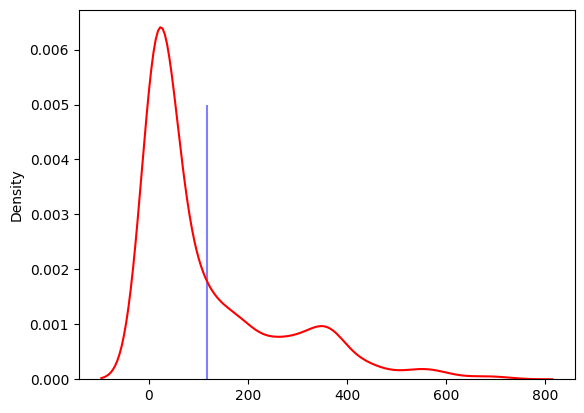

In [234]:
display(non_pay_duration)
display(non_pay_duration.values.astype(float) / 1000000000 * 60 * 60)
data = list((non_pay_duration.values.astype(float) / (1000000000 * 60 * 60 * 24)).round(0).astype(int))
data = [ x for x in data if x != 0 ]
mean = np.mean(data)

print(mean)
plt.vlines(mean, 0, 0.005, color='blue', alpha=0.5)
sns.kdeplot(data, color='red', label='non_pay_duration')